# Librerias



In [1]:

# Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

# Manejo de archivos Pandas
import pandas as pd

# Manejo de matrices
import numpy as np

# PCA
from sklearn.decomposition import PCA

# Aprendizajae NO supervisado
## Hacer K-Means
from sklearn.cluster import KMeans
## Hacer el dendograma de la agrupación jerárquica
from scipy.cluster.hierarchy import dendrogram, linkage
## Hacer las predicciones con agrupación jerárquica
from sklearn.cluster import AgglomerativeClustering

# Aprendizaje supervisado
## Algoritmos de ML para clasificación (13)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
## Algoritmos de ML para regresión (10)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# División de los datos en entrenamiento y testing
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import model_selection

# Metricas bonitas
from yellowbrick.classifier import confusion_matrix as  cm
from yellowbrick.classifier import classification_report as cr
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import class_prediction_error

# Herramientas
## Encoder, paso de variables categóricas a numéricas
from sklearn.preprocessing import LabelEncoder
## Para preprocesar las features
from sklearn import preprocessing

#Balance de clases
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss

# Visualización y gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# PCA
from sklearn.decomposition import PCA

# Importancia de características
from yellowbrick.model_selection import FeatureImportances



# Carga de los datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#path_data = "/content/drive/MyDrive/Ciencia de Datos 2023-01/Clase 7 - Rei/Datos/Litofaces/"
path_data = "/content/drive/MyDrive/Doctorado Ingenieria - 2023/Deep Learning Avanzado/"

path_sampledata = path_data+"/BDParkinson_Prediction.csv"

In [4]:
data = pd.read_csv(path_sampledata)

In [5]:
data

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,CLASS
0,0.624731,0.135424,0.000000,0.675282,0.182203,0.962960,Class_1
1,0.647223,0.136211,0.000000,0.679511,0.195903,0.987387,Class_1
2,0.706352,0.187593,0.000000,0.632989,0.244884,0.991182,Class_1
3,0.680291,0.192076,0.000000,0.651786,0.233528,0.991857,Class_1
4,0.660104,0.161131,0.000000,0.677162,0.209531,0.991066,Class_1
...,...,...,...,...,...,...,...
495,0.712586,0.219776,0.510939,0.593045,0.268087,0.092055,Class_4
496,0.686058,0.224004,0.518661,0.600564,0.253298,0.093827,Class_4
497,0.698661,0.216604,0.505791,0.591165,0.241696,0.090734,Class_4
498,0.714926,0.222613,0.562420,0.587406,0.271037,0.093245,Class_4


# Análisis exploratorio de datos - EDA

In [6]:
print(f'Número de clases {len(data["CLASS"].value_counts())}')

Número de clases 4


Class_1    125
Class2     125
Class_3    125
Class_4    125
Name: CLASS, dtype: int64


Text(0, 0.5, 'Frecuencia')

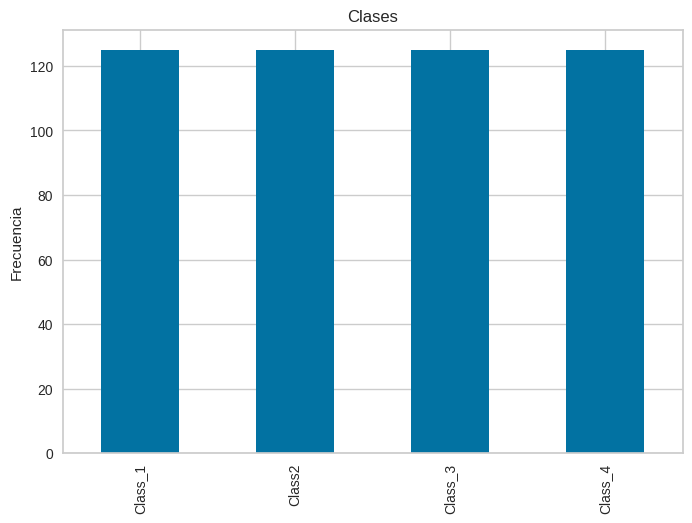

In [7]:
# Frecuencia por clase
print(data["CLASS"].value_counts())

ax = data['CLASS'].value_counts().plot(kind='bar')
ax.set_title('Clases')
ax.set_ylabel('Frecuencia')

In [8]:
# Cuenta de datos en las features, se puede verificar que no haya features con valores nulos
data.groupby("CLASS").count()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6
CLASS,,,,,,
Class2,125,125,125,125,125,125
Class_1,125,125,125,125,125,125
Class_3,125,125,125,125,125,125
Class_4,125,125,125,125,125,125


In [9]:
# Encontrar la correlación por pares de todas las columnas
data.corr()

<ipython-input-9-2c34e1658ceb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6
VAR1,1.000000,0.576977,-0.253137,-0.612760,0.830722,0.065330
VAR2,0.576977,1.000000,0.065845,-0.647360,0.465732,-0.344490
VAR3,-0.253137,0.065845,1.000000,0.357690,-0.477345,-0.913283
VAR4,-0.612760,-0.647360,0.357690,1.000000,-0.545582,0.013846
VAR5,0.830722,0.465732,-0.477345,-0.545582,1.000000,0.323021
VAR6,0.065330,-0.344490,-0.913283,0.013846,0.323021,1.000000


In [10]:
# Nombre de las features, conteo de cantidades, verificación de valores nulos, ver tipo de dato de cada feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VAR1    500 non-null    float64
 1   VAR2    500 non-null    float64
 2   VAR3    500 non-null    float64
 3   VAR4    500 non-null    float64
 4   VAR5    500 non-null    float64
 5   VAR6    500 non-null    float64
 6   CLASS   500 non-null    object 
dtypes: float64(6), object(1)
memory usage: 27.5+ KB


In [11]:
# Estadísticas básicas en las features: media, desviación estandar, valor mínimo, cuartiles, y valor máximo
data.describe()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.735121,0.197308,0.467928,0.696034,0.282903,0.314853
std,0.075174,0.068170,0.302631,0.144894,0.105843,0.391511
min,0.613236,0.109302,0.000000,0.515038,0.140636,0.045782
25%,0.671658,0.134198,0.274775,0.576128,0.216137,0.090241
50%,0.716317,0.218196,0.527671,0.642387,0.268986,0.102930
75%,0.805635,0.246461,0.585586,0.737429,0.341426,0.616969
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


count    500.000000
mean       0.696034
std        0.144894
min        0.515038
25%        0.576128
50%        0.642387
75%        0.737429
max        1.000000
Name: VAR4, dtype: float64


<Figure size 900x800 with 0 Axes>

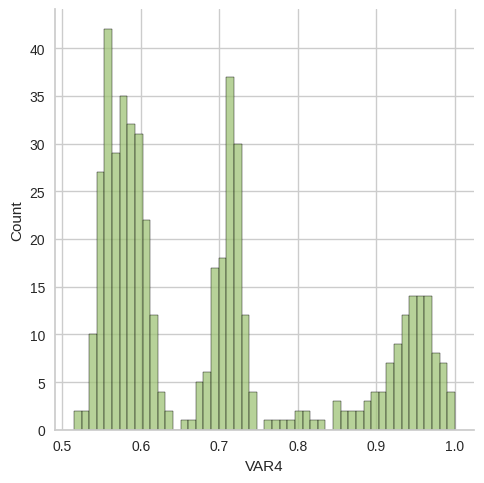

In [12]:
print(data['VAR4'].describe())
plt.figure(figsize=(9, 8))
graf=sns.displot(data['VAR4'], color='g', bins=50);

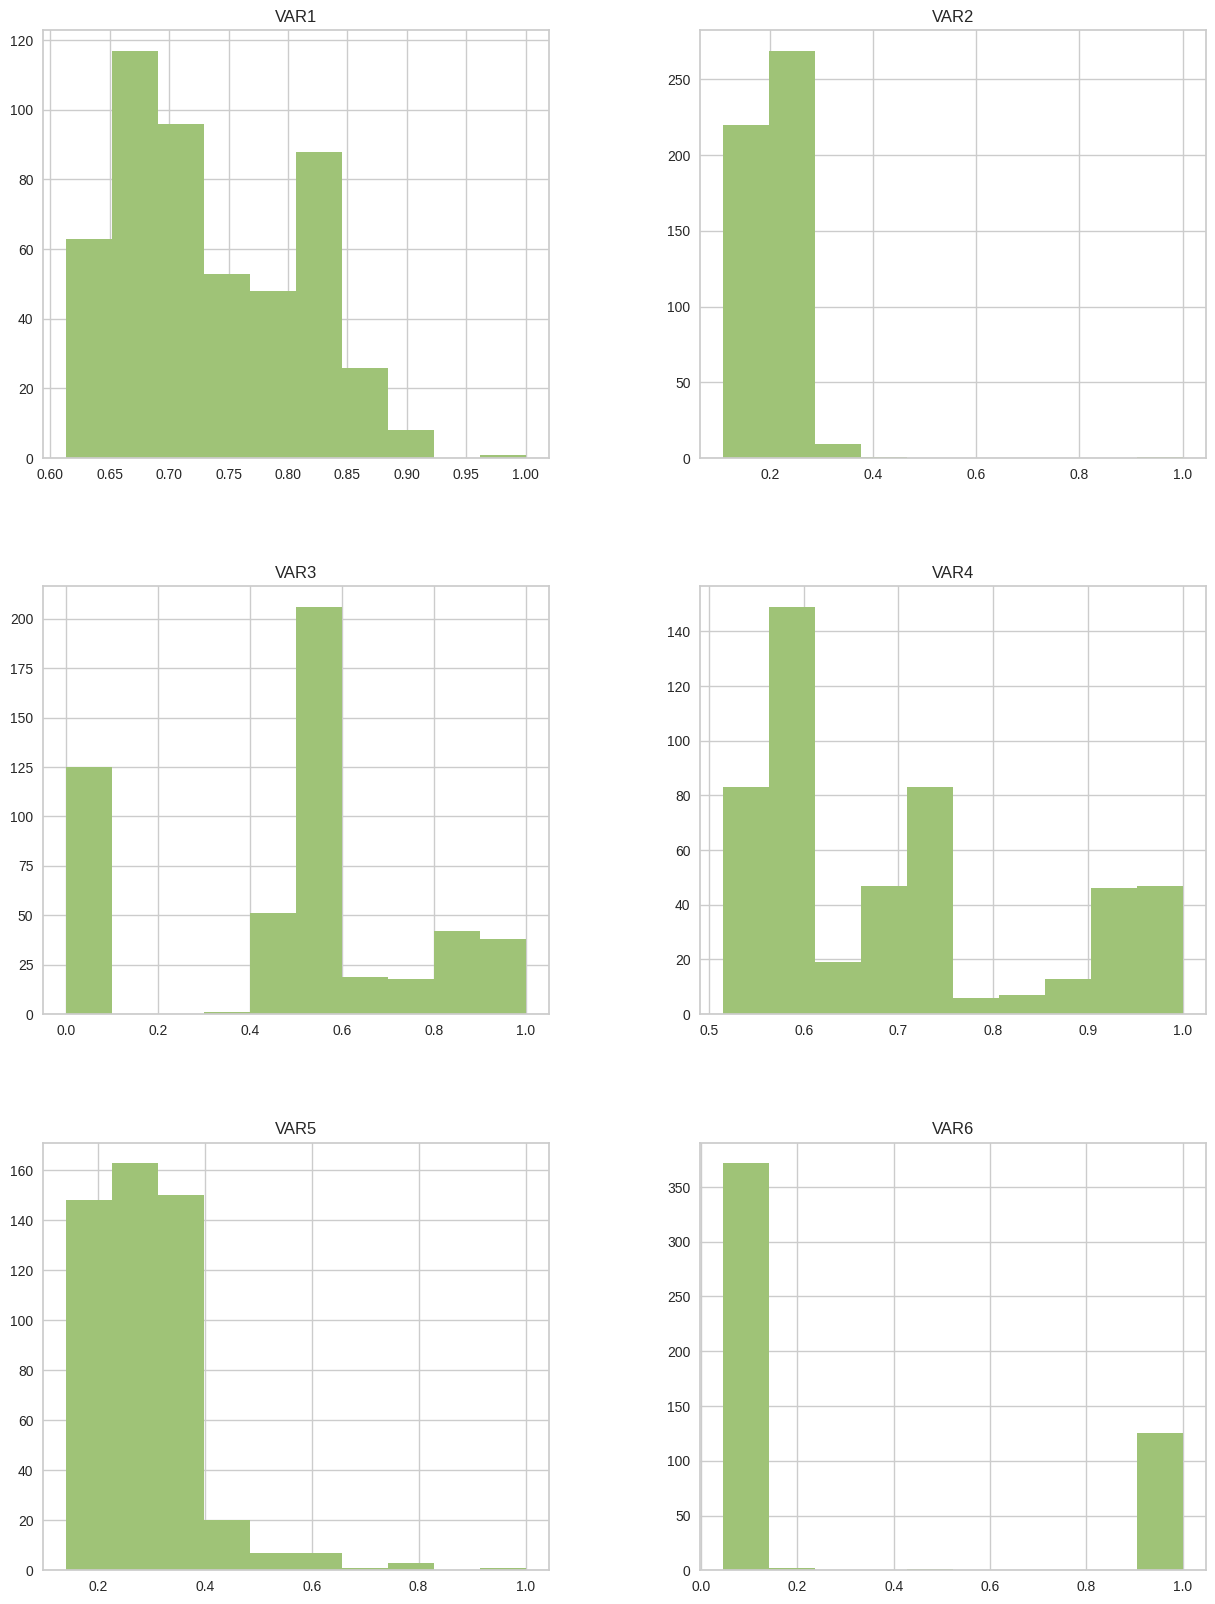

In [13]:
# Histograma de cada feature, para ver las distribuciones en cada feature y detectar alguna anómala o con pocos datos fuera de rango o incluso features nulas
data.hist(figsize = (15,20), color='g')
plt.show()

<ipython-input-14-abef22ae6e1b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


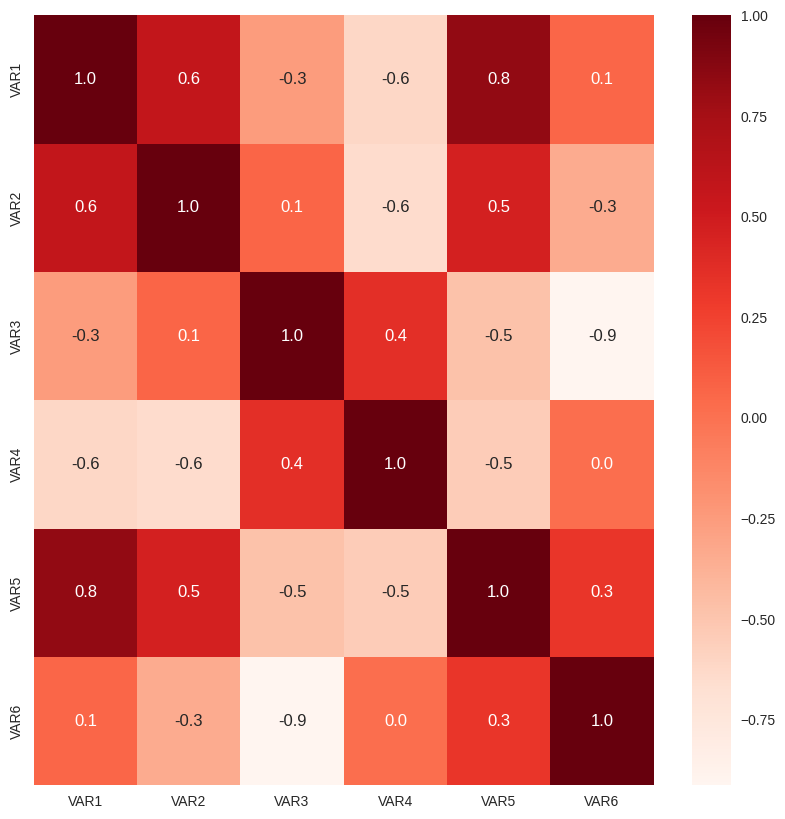

In [14]:
# Matriz de correlación
corr = data.corr()

# Mapas de calor de la matriz de correlación
plt.figure(figsize=(10,10))
sns.heatmap(corr,fmt='.1f',annot=True,cmap='Reds')
plt.show()

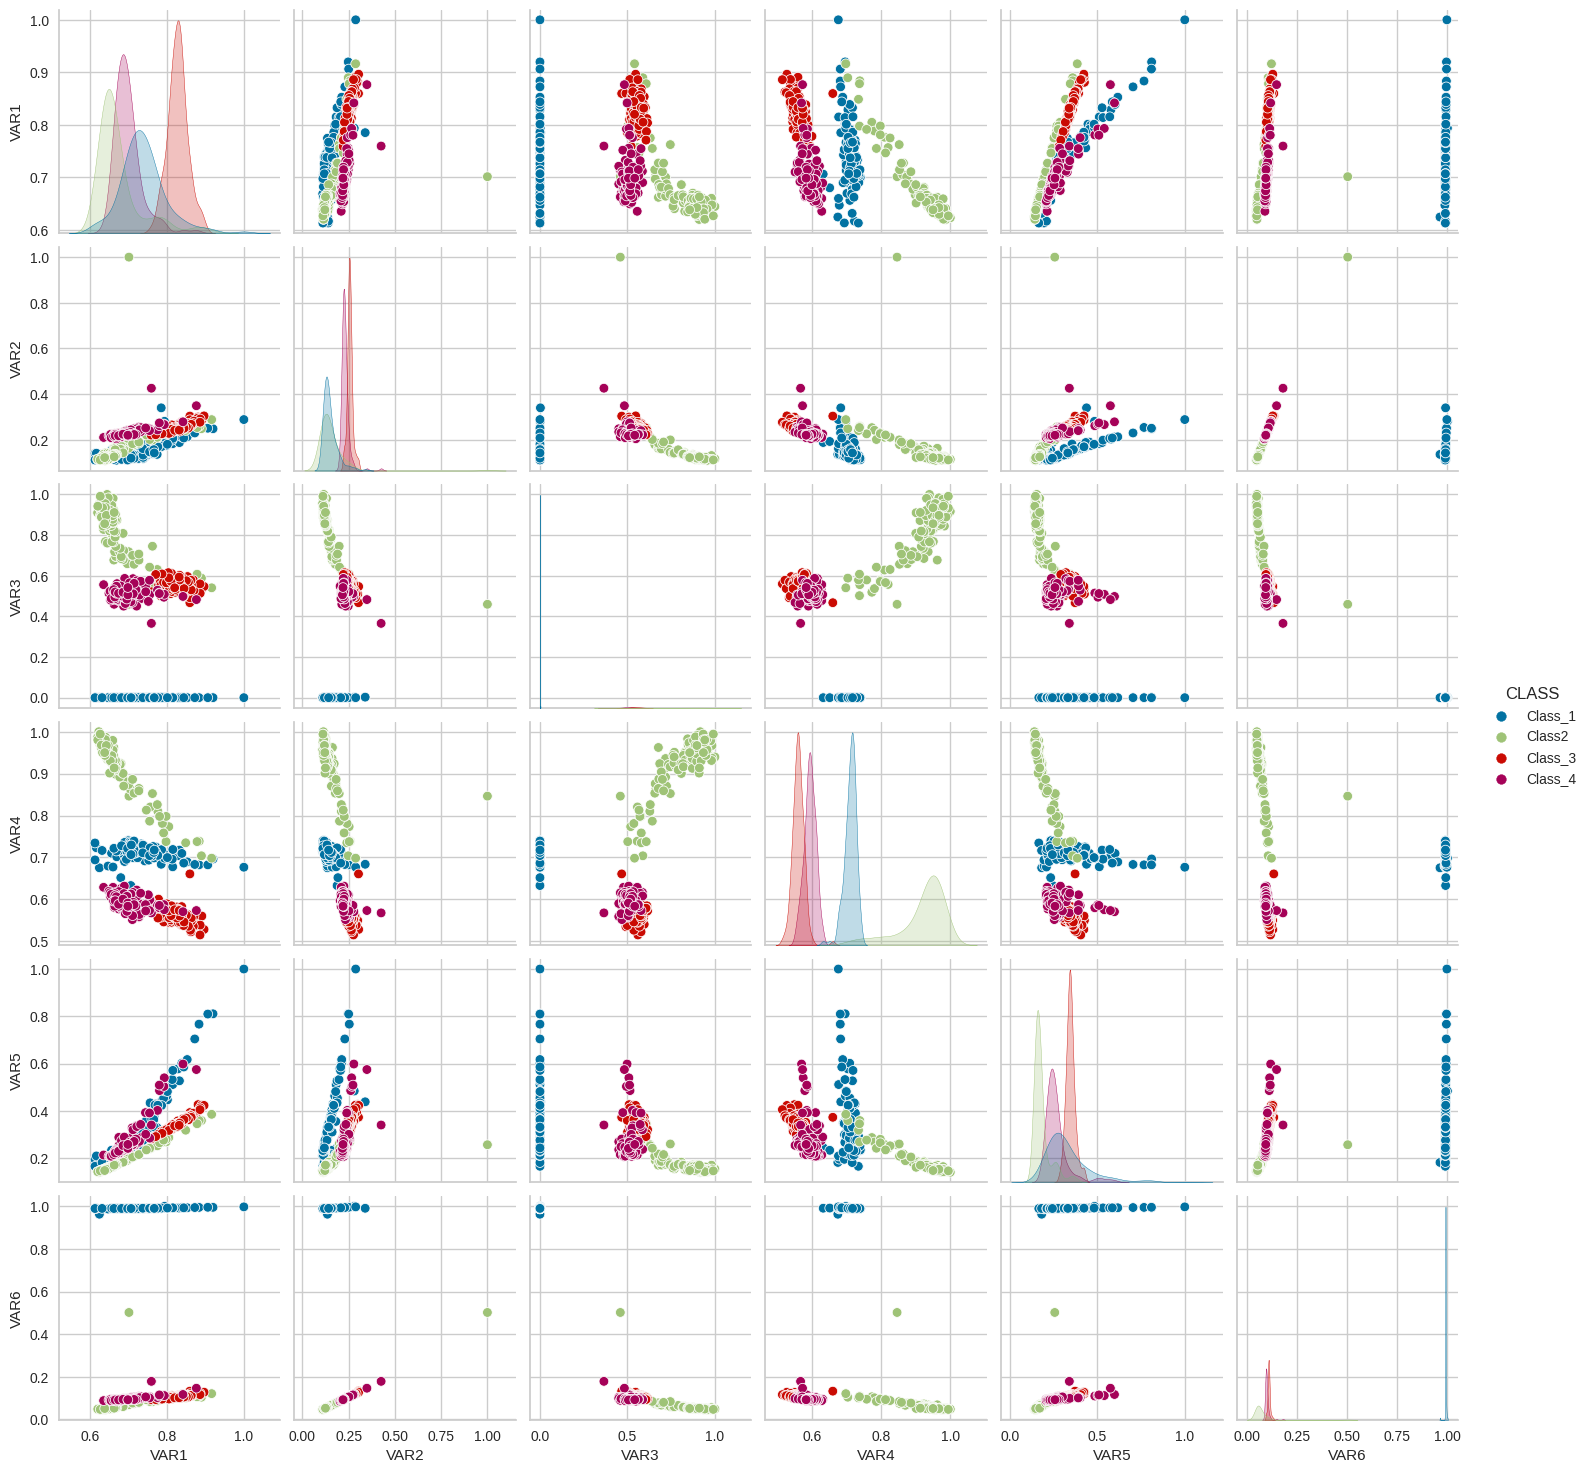

In [15]:
# Pairplot
sns.pairplot(data, hue="CLASS")

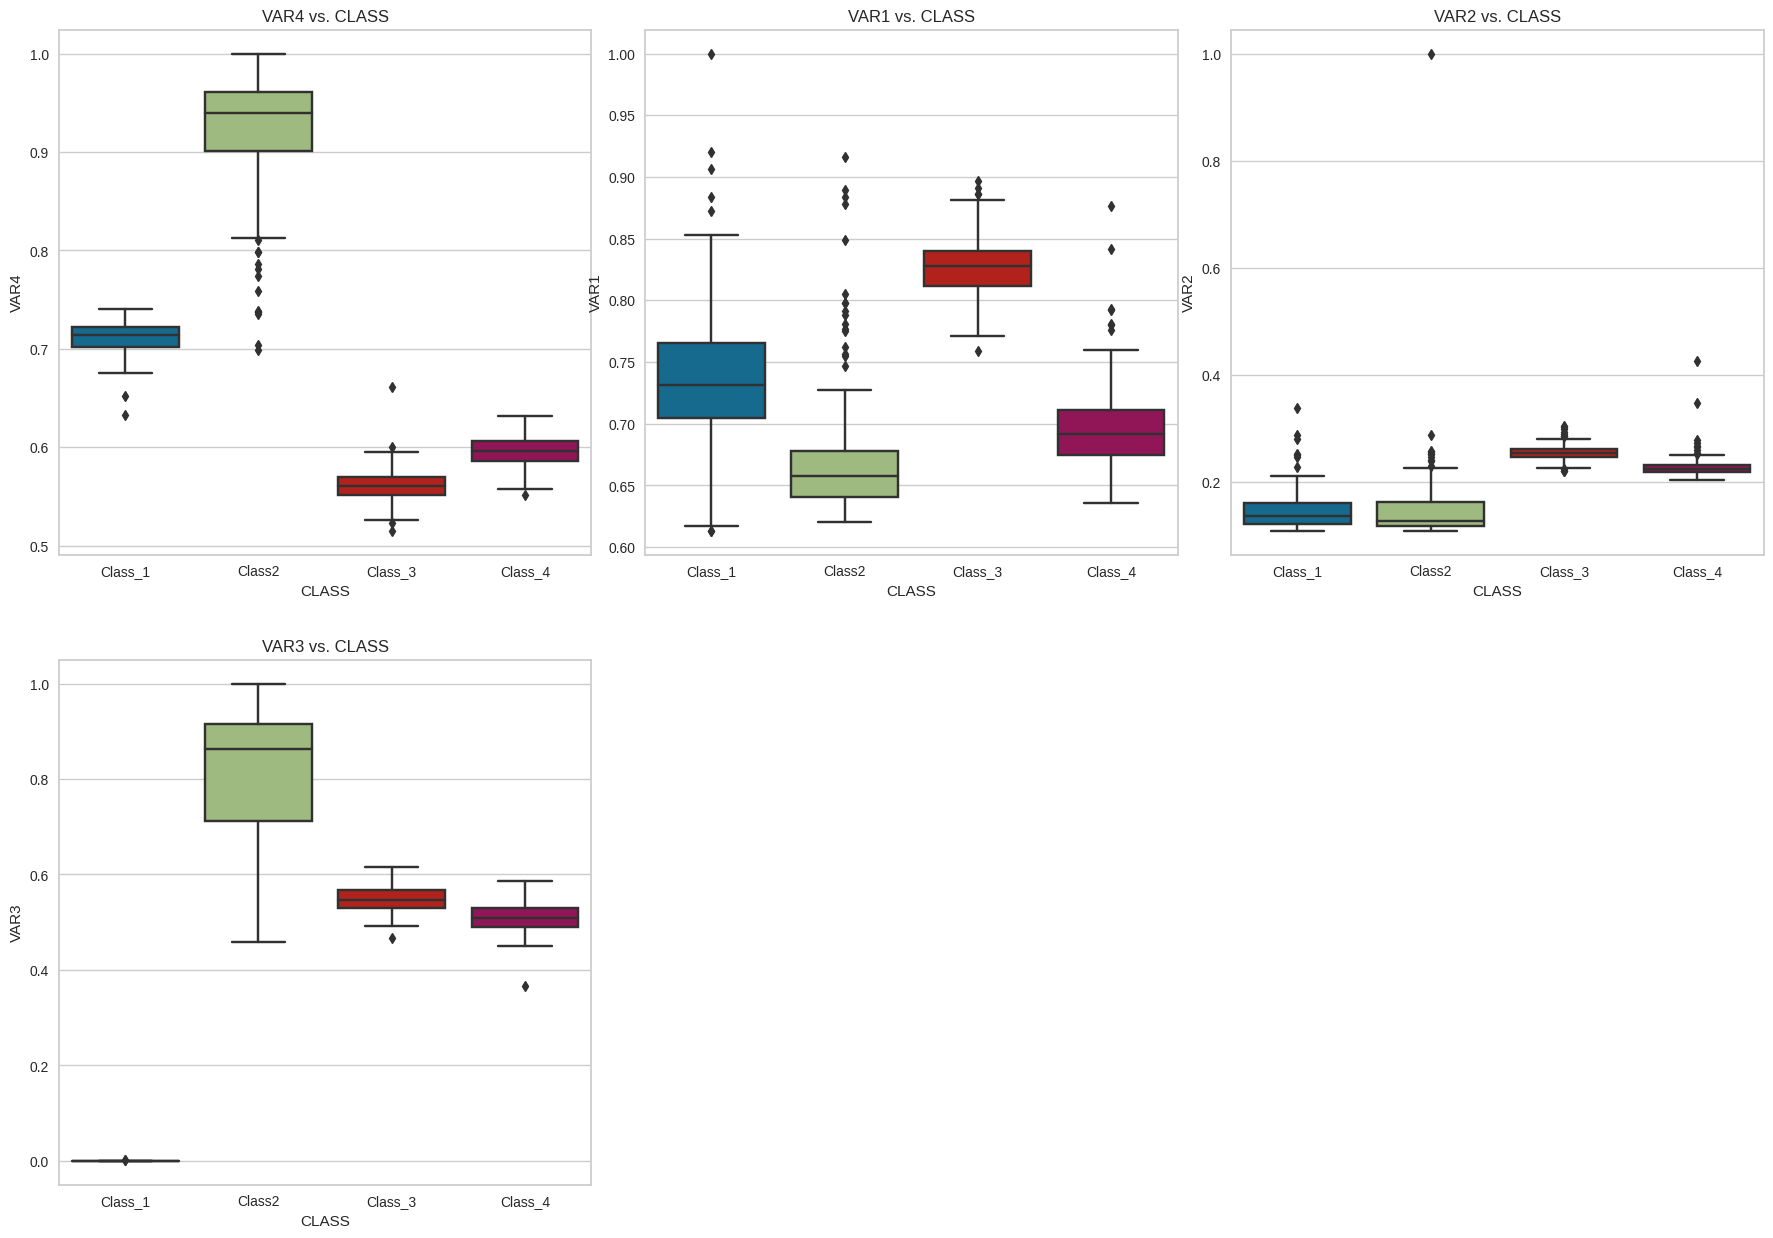

In [16]:
# Construyendo diagramas de cajon para representar la distribucion del conjunto de datos numéricos a través de sus cuartiles
nrows=2
ncols=3

fig = plt.figure(figsize=(22,15))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

###############################################
i=1
ax = fig.add_subplot(nrows, ncols, i)
sns.boxplot(data=data, x="CLASS", y="VAR4")
ax.set_xlabel("CLASS")
ax.set_ylabel("VAR4")
ax.set_title('VAR4 vs. CLASS')
###############################################
i=2
ax = fig.add_subplot(nrows, ncols, i)
sns.boxplot(data=data, x="CLASS", y="VAR1")
ax.set_xlabel("CLASS")
ax.set_ylabel("VAR1")
ax.set_title('VAR1 vs. CLASS')
###############################################
i=3
ax = fig.add_subplot(nrows, ncols, i)
sns.boxplot(data=data, x="CLASS", y="VAR2")
ax.set_xlabel("CLASS")
ax.set_ylabel("VAR2")
ax.set_title('VAR2 vs. CLASS')
###############################################
i=4
ax = fig.add_subplot(nrows, ncols, i)
sns.boxplot(data=data, x="CLASS", y="VAR3")
ax.set_xlabel("CLASS")
ax.set_ylabel("VAR3")
ax.set_title('VAR3 vs. CLASS')
plt.show()

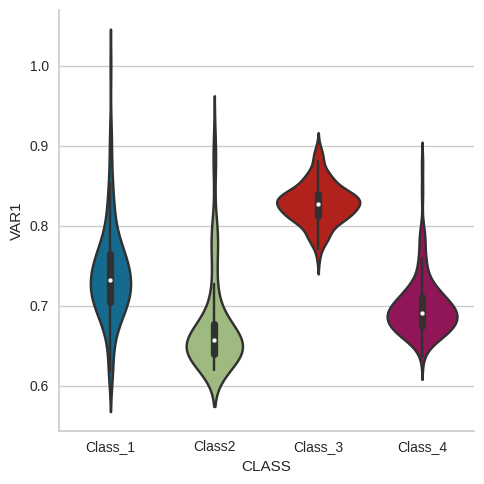

In [17]:
# Diagrama de violin para combinar los beneficios del histograma y del diagrama de caja
sns.catplot(data=data, kind="violin", x="CLASS", y="VAR1")

# Proceso de división de datos de entrenamiento y testing

In [18]:
# Obtener las features
features = data.drop(['CLASS'], axis=1)
features.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6
0,0.624731,0.135424,0.0,0.675282,0.182203,0.962960
1,0.647223,0.136211,0.0,0.679511,0.195903,0.987387
2,0.706352,0.187593,0.0,0.632989,0.244884,0.991182
3,0.680291,0.192076,0.0,0.651786,0.233528,0.991857
4,0.660104,0.161131,0.0,0.677162,0.209531,0.991066


In [19]:
# Obtener los labels
labels = data['CLASS']
labels.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: CLASS, dtype: object

In [20]:
features.shape,labels.shape

((500, 6), (500,))

In [21]:
# Separación de la data, con un 20% para testing, y 80% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.20, random_state=1, stratify=labels)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 6), (100, 6), (400,), (100,))

In [23]:
# Verificacion de la cantidad de datos para entrenamiento y para testing
print("y_train labels unique:",np.unique(y_train, return_counts=True))
print("y_test labels unique: ",np.unique(y_test, return_counts=True))

y_train labels unique: (array(['Class2', 'Class_1', 'Class_3', 'Class_4'], dtype=object), array([100, 100, 100, 100]))
y_test labels unique:  (array(['Class2', 'Class_1', 'Class_3', 'Class_4'], dtype=object), array([25, 25, 25, 25]))


# Análisis de componentes principales

In [24]:
# PCA con varianza acumulada
pca = PCA()
pca.fit(features)
data_pca = pca.transform(features)
data_pca = pd.DataFrame(features)
data_pca.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6
0,0.624731,0.135424,0.0,0.675282,0.182203,0.962960
1,0.647223,0.136211,0.0,0.679511,0.195903,0.987387
2,0.706352,0.187593,0.0,0.632989,0.244884,0.991182
3,0.680291,0.192076,0.0,0.651786,0.233528,0.991857
4,0.660104,0.161131,0.0,0.677162,0.209531,0.991066


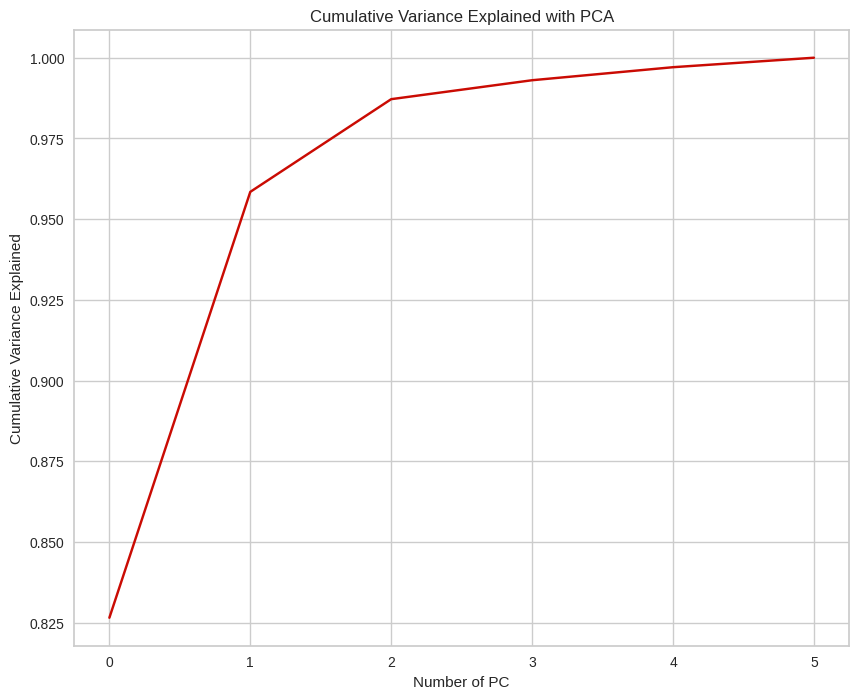

In [25]:
# Plot the cumulative variance explained

plt.figure(figsize = (10, 8))
plt.plot(list(range(features.shape[1])), np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.xlabel('Number of PC'); plt.ylabel('Cumulative Variance Explained');
plt.title('Cumulative Variance Explained with PCA');

In [26]:
# Preparación del PCA para ver el impacto de las features
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6
VAR1,0.012145,-0.055199,0.041961,-0.008023,0.015839,-0.019510
VAR2,-0.015564,-0.053439,0.009489,0.036206,0.011265,0.004620
VAR3,-0.293410,0.064120,0.030685,-0.008218,0.014818,0.012513
VAR4,-0.021452,0.138315,0.030672,0.014987,-0.010484,-0.011296
VAR5,0.043546,-0.068468,0.065088,-0.002410,-0.017140,0.009097


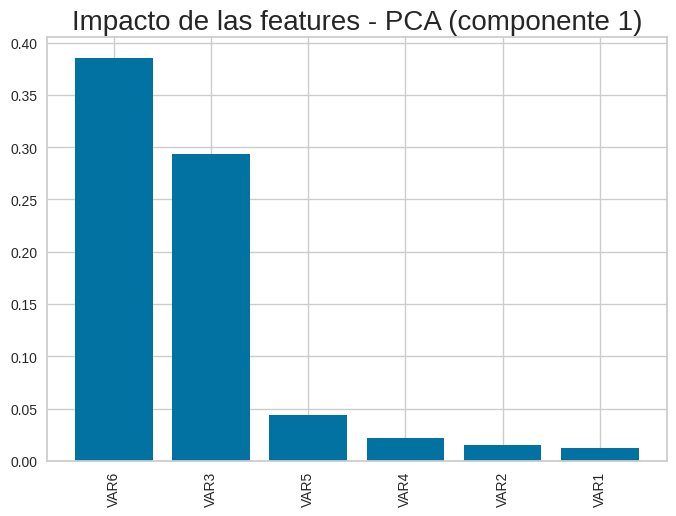

In [27]:
# Analizar el impacto de las features según la primera componente del PCA
pc1_loadings = abs(loadings).sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Feature', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Feature'], height=pc1_loadings['CorrelationWithPC1'])
plt.title('Impacto de las features - PCA (componente 1)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [28]:
# Hacer PCA para obtener una cantidad indicada de componentes principales
pca = PCA(n_components = 6)
pca.fit(features)
data_pca = pca.transform(features)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.785630,0.127230,-0.175069,0.004800,0.021135,0.032631
1,0.806530,0.126829,-0.148843,-0.000205,0.032687,0.027583
2,0.815789,0.046927,-0.096071,0.013380,0.068264,0.030604
3,0.813689,0.070654,-0.109307,0.029901,0.057801,0.038155
4,0.810287,0.111080,-0.130638,0.017292,0.042147,0.029174


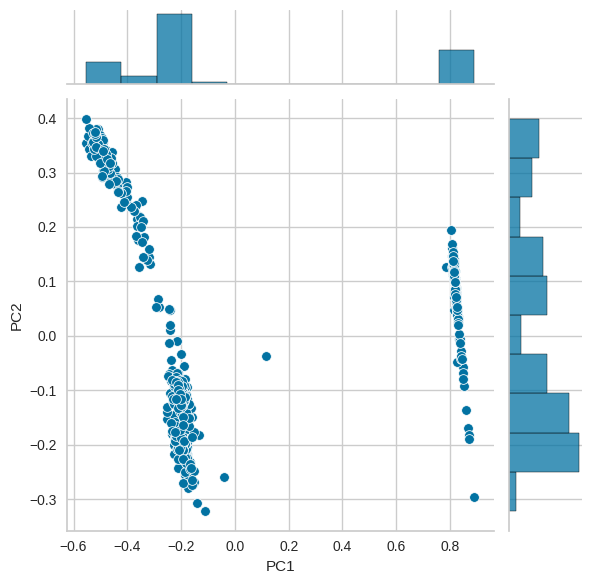

In [29]:
# Gráfico de las dos componentes
#sns.scatterplot(data=data_pca, x="PC1", y="PC2")
sns.jointplot(data=data_pca, x="PC1", y="PC2")

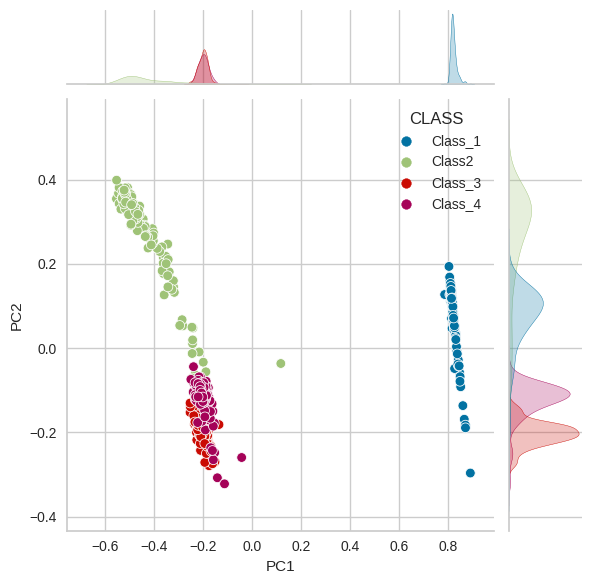

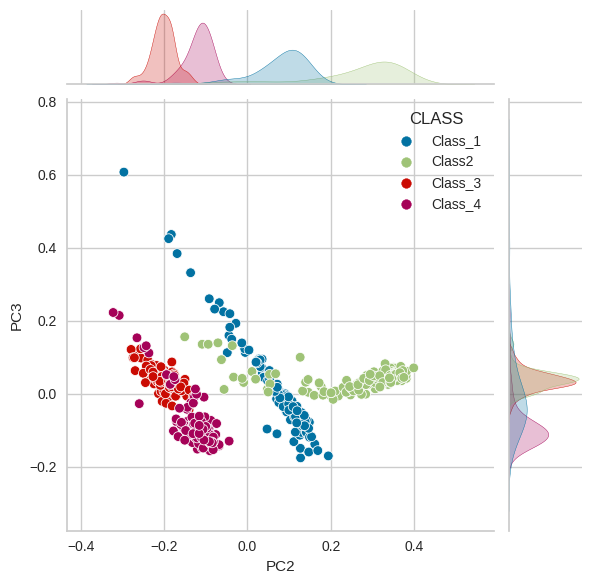

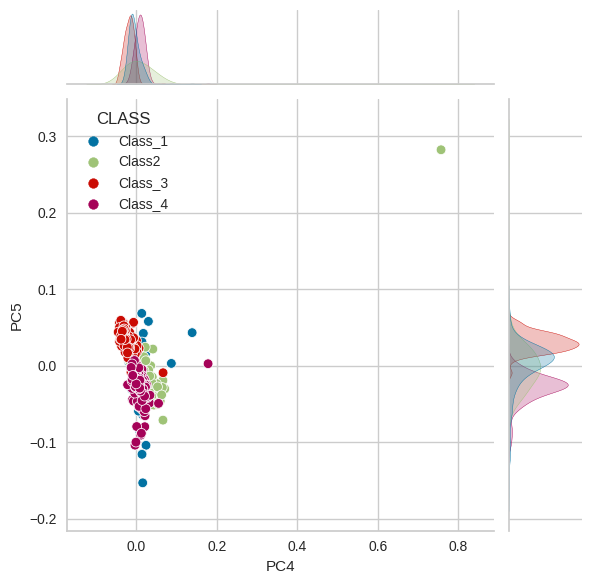

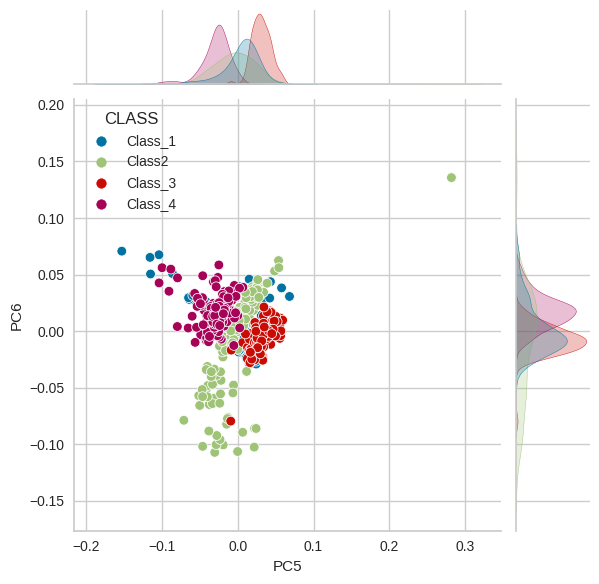

In [30]:
# Gráfico de las dos componentes y los labels reales
data_pca_labels = pd.concat([data_pca,data["CLASS"]],axis=1)
#sns.scatterplot(data=data_pca_labels, x="PC1", y="PC2", hue="CLASS")
sns.jointplot(data=data_pca_labels, x="PC1", y="PC2", hue="CLASS")
sns.jointplot(data=data_pca_labels, x="PC2", y="PC3", hue="CLASS")
sns.jointplot(data=data_pca_labels, x="PC4", y="PC5", hue="CLASS")
sns.jointplot(data=data_pca_labels, x="PC5", y="PC6", hue="CLASS")

# Método K-Nearest Neighbors (KNN)

In [31]:
# Cargamos el modelo KNN sin entrenar
model_KNN = KNeighborsClassifier(n_neighbors=3)

In [32]:
# Entrenamos el modelo KNN
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
import pickle

In [35]:
with open('modelKNN.pkl', 'wb') as archivo:
  pickle.dump(model_KNN, archivo)

In [36]:
# Hacemos predicción en testing
y_pred = model_KNN.predict(X_test)

In [37]:
# Mostramos las predicciones
y_pred

array(['Class_1', 'Class_1', 'Class_3', 'Class_1', 'Class_4', 'Class2',
       'Class2', 'Class_4', 'Class_4', 'Class_1', 'Class_1', 'Class_4',
       'Class_3', 'Class_3', 'Class2', 'Class_4', 'Class_1', 'Class_4',
       'Class2', 'Class_1', 'Class_4', 'Class_4', 'Class_1', 'Class2',
       'Class_1', 'Class_4', 'Class_4', 'Class_3', 'Class_4', 'Class2',
       'Class_1', 'Class_1', 'Class_1', 'Class_4', 'Class_3', 'Class_3',
       'Class_1', 'Class_1', 'Class_4', 'Class_1', 'Class_4', 'Class2',
       'Class_4', 'Class_1', 'Class_4', 'Class_3', 'Class2', 'Class_3',
       'Class_3', 'Class2', 'Class2', 'Class_3', 'Class2', 'Class2',
       'Class2', 'Class2', 'Class_1', 'Class2', 'Class2', 'Class_3',
       'Class_3', 'Class_4', 'Class2', 'Class_4', 'Class_4', 'Class_4',
       'Class2', 'Class_1', 'Class_3', 'Class_1', 'Class2', 'Class_3',
       'Class_3', 'Class_4', 'Class_3', 'Class_1', 'Class_4', 'Class2',
       'Class_1', 'Class_1', 'Class2', 'Class_1', 'Class_3', 'Class_4',

In [38]:
y_test.to_numpy()

array(['Class_1', 'Class_1', 'Class_3', 'Class_1', 'Class_4', 'Class2',
       'Class2', 'Class_4', 'Class_4', 'Class_1', 'Class_1', 'Class_4',
       'Class_3', 'Class_3', 'Class2', 'Class_4', 'Class_1', 'Class_4',
       'Class2', 'Class_1', 'Class_4', 'Class_4', 'Class_1', 'Class2',
       'Class_1', 'Class_4', 'Class_4', 'Class_3', 'Class_4', 'Class2',
       'Class_1', 'Class_1', 'Class_1', 'Class_4', 'Class_3', 'Class_3',
       'Class_1', 'Class_1', 'Class_4', 'Class_1', 'Class_4', 'Class2',
       'Class_4', 'Class_1', 'Class_4', 'Class_3', 'Class2', 'Class_3',
       'Class_3', 'Class2', 'Class2', 'Class_3', 'Class2', 'Class2',
       'Class2', 'Class2', 'Class_1', 'Class2', 'Class2', 'Class_3',
       'Class_3', 'Class_4', 'Class2', 'Class_4', 'Class_4', 'Class_4',
       'Class2', 'Class_1', 'Class_3', 'Class_1', 'Class2', 'Class_3',
       'Class_3', 'Class_4', 'Class_3', 'Class_1', 'Class_4', 'Class2',
       'Class_1', 'Class_1', 'Class2', 'Class_1', 'Class_3', 'Class_4',

In [39]:
# Hacemos predicción en testing para obtener las probabilidades
y_pred_proba = model_KNN.predict_proba(X_test)[:,1]

# Mostramos las predicciones
y_pred_proba.shape

(100,)

In [40]:
y_pred_proba

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.])

# Métricas - KNN

In [ ]:
# Matriz de confusión
confusion_matrix(y_test,y_pred)

array([[25,  0,  0,  0],
       [ 0, 25,  0,  0],
       [ 0,  0, 25,  0],
       [ 0,  0,  0, 25]])

In [ ]:
# Accuracy
accuracy_s = accuracy_score(y_test,y_pred)
print('accuracy_score: {0:.4f}'.format(accuracy_s))

accuracy_score: 1.0000


In [ ]:
# Precision
precision_s = precision_score(y_test,y_pred,average='macro')
print('precision_score: {0:.4f}'.format(precision_s))

precision_score: 1.0000


In [ ]:
# Recall
recall_s = recall_score(y_test,y_pred,average='macro')
print('recall_score: {0:.4f}'.format(recall_s))

recall_score: 1.0000


In [ ]:
# F1-score
f1_s = f1_score(y_test,y_pred,average='macro')
print('f1_score: {0:.4f}'.format(f1_s))

f1_score: 1.0000


In [ ]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Class2       1.00      1.00      1.00        25
     Class_1       1.00      1.00      1.00        25
     Class_3       1.00      1.00      1.00        25
     Class_4       1.00      1.00      1.00        25

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
# Validación cruzada

## Se define el modelo de ML
model_KNN = KNeighborsClassifier(n_neighbors=3)

## Se establece la cantidad de folds
kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=0)

## Se hace la validación cruzada
cv_results = np.array(model_selection.cross_val_score(model_KNN, features, labels, cv=kfold, scoring='accuracy', n_jobs=-1))

## kfold accuracies
print(cv_results,"\n")

## Media y desviación estandar con la valicación cruzada
print(cv_results.mean(),cv_results.std())

[1.   1.   1.   1.   1.   0.98 1.   1.   1.   0.98] 

0.9960000000000001 0.008000000000000007


# KMeans para revisar las categorias que dan sin Tomar el label

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

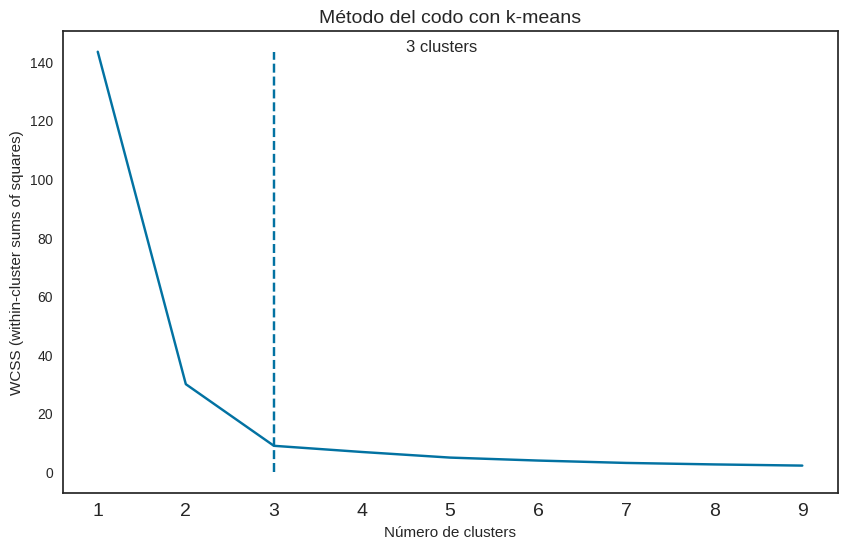

In [ ]:
# Método del codo
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state=0)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 10), wcss)
    plt.title('Método del codo con k-means',fontsize=14)
    plt.xlabel('Número de clusters')
    plt.ylabel('WCSS (within-cluster sums of squares)')
    plt.xticks(fontsize=14)
    plt.vlines(x=3,ymin=0,ymax=max(wcss),linestyles='--')
    plt.text(x=4.5,y=max(wcss),s='3 clusters')
    plt.show()

In [ ]:
# K-means con 4 clusters por conocimiento del problema  CON TODAS LAS FEATURES
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
#Centroides
kmeans.cluster_centers_.shape,kmeans.cluster_centers_

((4, 6),
 array([[6.98071963e-01, 2.25741274e-01, 5.15685968e-01, 6.12421059e-01,
         2.49599956e-01, 9.46081328e-02],
        [7.38768074e-01, 1.49439662e-01, 3.08880000e-05, 7.10672932e-01,
         3.36244313e-01, 9.90653894e-01],
        [6.55140710e-01, 1.33079970e-01, 8.52352355e-01, 9.41346426e-01,
         1.64265948e-01, 5.57466620e-02],
        [8.25353356e-01, 2.63267335e-01, 5.45389450e-01, 5.70174339e-01,
         3.55493335e-01, 1.10902387e-01]]))

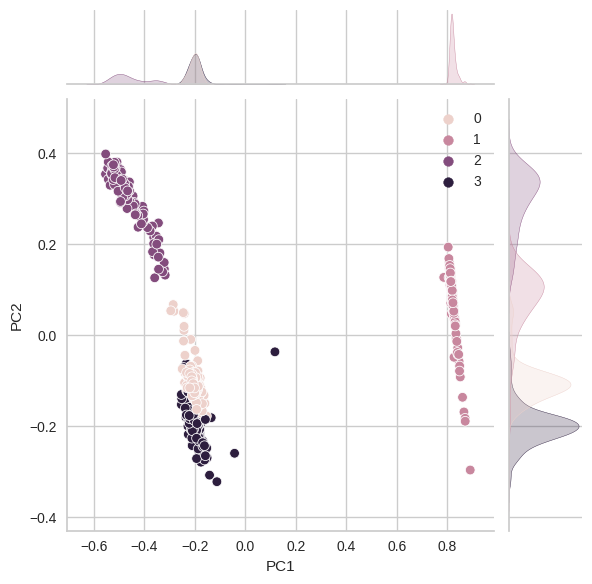

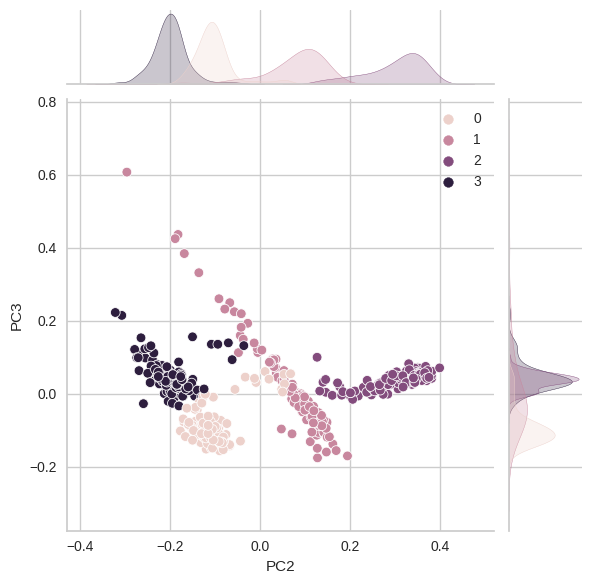

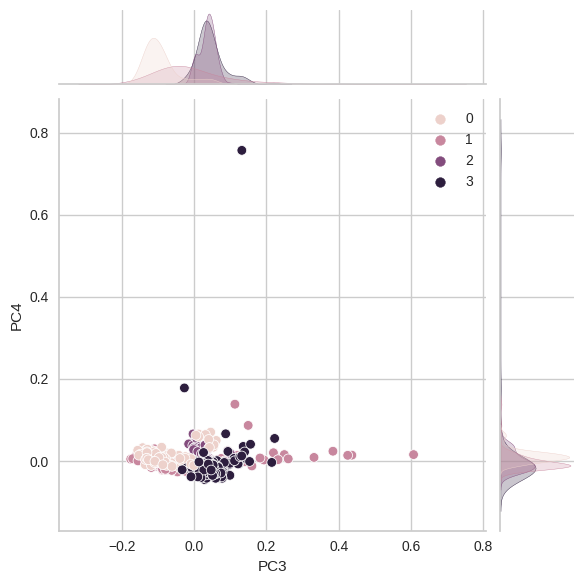

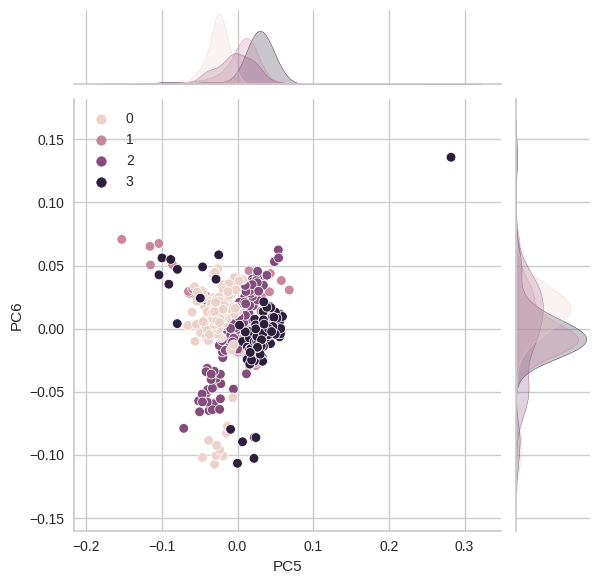

In [ ]:
# Gráfico de las dos componentes, y los clusters
sns.jointplot(data=data_pca, x="PC1", y="PC2", hue=kmeans.labels_)
sns.jointplot(data=data_pca, x="PC2", y="PC3", hue=kmeans.labels_)
sns.jointplot(data=data_pca, x="PC3", y="PC4", hue=kmeans.labels_)
sns.jointplot(data=data_pca, x="PC5", y="PC6", hue=kmeans.labels_)

In [ ]:
# K-means con 4 clusters por conocimiento del problema SÓLO CON LAS COMPONENTES DEL PCA
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_pca)
print(kmeans.cluster_centers_)

[[-2.04135011e-01 -1.01436135e-01 -9.07628925e-02  1.26069208e-02
  -2.59276474e-02  6.35546670e-03]
 [ 8.22122778e-01  7.11061897e-02  6.52863992e-03 -3.57030774e-03
   6.29041680e-04  1.02183109e-03]
 [-4.57782125e-01  2.98009580e-01  3.62081118e-02  2.19813484e-04
  -2.73172014e-03 -7.58214480e-04]
 [-1.95830996e-01 -1.99956278e-01  4.66113063e-02 -8.12194709e-03
   2.43475457e-02 -5.91743000e-03]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


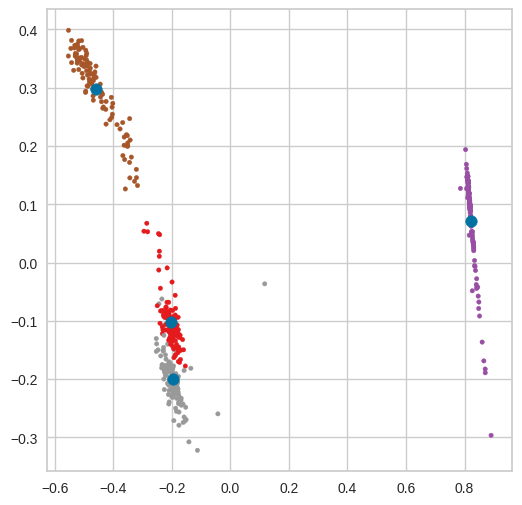

In [ ]:
# Gráfico de las dos componentes, los clusters, y los centroides
plt.figure(figsize=(6,6))
plt.scatter(np.array(data_pca)[:,0], np.array(data_pca)[:,1], s=10, c=kmeans.labels_, cmap='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="b", s=70)
plt.show()

# Aprendizaje Supervisado

## MLPClassifier

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [42]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[0.00110133, 0.99484967, 0.00105062, 0.00299839]])

In [43]:
y_pred1 = clf.predict(X_test)

In [44]:
clf.score(X_test, y_test)

0.95

# Métricas - MLPClassifier

In [45]:
# Matriz de confusión
confusion_matrix(y_test,y_pred1)

array([[24,  0,  1,  0],
       [ 0, 25,  0,  0],
       [ 0,  0, 23,  2],
       [ 0,  0,  2, 23]])

In [46]:
# Accuracy
accuracy_s = accuracy_score(y_test,y_pred1)
print('accuracy_score: {0:.4f}'.format(accuracy_s))

accuracy_score: 0.9500


In [47]:
# Precision
precision_s = precision_score(y_test,y_pred1,average='macro')
print('precision_score: {0:.4f}'.format(precision_s))

precision_score: 0.9512


In [48]:
# Recall
recall_s = recall_score(y_test,y_pred1,average='macro')
print('recall_score: {0:.4f}'.format(recall_s))

recall_score: 0.9500


In [49]:
# F1-score
f1_s = f1_score(y_test,y_pred1,average='macro')
print('f1_score: {0:.4f}'.format(f1_s))

f1_score: 0.9504


In [50]:
# Reporte de clasificación
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

      Class2       1.00      0.96      0.98        25
     Class_1       1.00      1.00      1.00        25
     Class_3       0.88      0.92      0.90        25
     Class_4       0.92      0.92      0.92        25

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [51]:
# Validación cruzada

## Se define el modelo de ML
model_KNN = KNeighborsClassifier(n_neighbors=3)

## Se establece la cantidad de folds
kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=0)

## Se hace la validación cruzada
cv_results = np.array(model_selection.cross_val_score(model_KNN, features, labels, cv=kfold, scoring='accuracy', n_jobs=-1))

## kfold accuracies
print(cv_results,"\n")

## Media y desviación estandar con la valicación cruzada
print(cv_results.mean(),cv_results.std())

[1.   1.   1.   1.   1.   0.98 1.   1.   1.   0.98] 

0.9960000000000001 0.008000000000000007


# Métricas gráficas

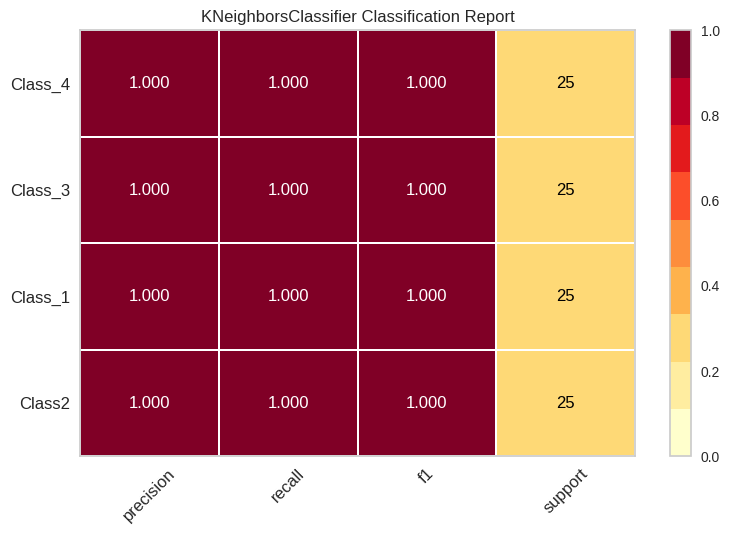

In [52]:
le = LabelEncoder()
le.fit(list(np.unique(np.array(y_train)))) #['B', 'M']
y_train_coded = le.transform(y_train)
y_test_coded = le.transform(y_test)

# Reporte de clasificación
model = KNeighborsClassifier(n_neighbors=3)
visualizer_cr = cr(model, X_train, y_train_coded, X_test, y_test_coded, classes=list(np.unique(np.array(y_train))), support=True)

## Importancia de caracteristicas

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


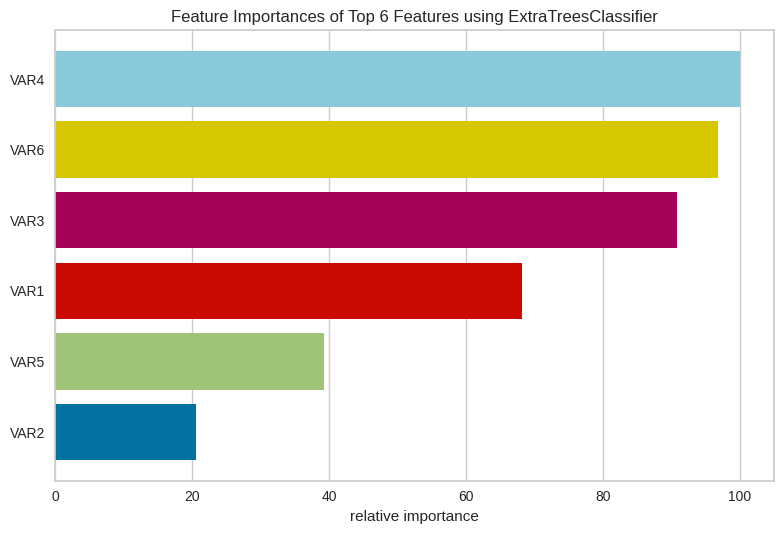

<Axes: title={'center': 'Feature Importances of Top 6 Features using ExtraTreesClassifier'}, xlabel='relative importance'>

In [53]:
# Definir el algoritmo de ML
model = ExtraTreesClassifier(random_state=0)
model.fit(X_train, y_train)

# Mostrar la importancia de características
viz = FeatureImportances(model, topn=6)
viz.fit(X_train, y_train)
viz.show()

In [54]:
with open('modelMLP.pkl', 'wb') as archivo:
  pickle.dump(model, archivo)

# Auto Machine Learning - AutoGluon

In [ ]:
# Instalación Autoglon:
!pip install -U pip
!pip install -U setuptools wheel
!pip install autogluon  # autogluon==0.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/26/7945080113158354380a12ce26873dd6c1ebd88d47f5bc24e2c5bb38c16a/setuptools-68.2.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.9/807.9 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


  Obtaining dependency information for autogluon from https://files.pythonhosted.org/packages/2e/42/f26592ecf3dc4e4edcbc5f7f7e3deba25b0681fad2ad04a82d12af17e3a4/autogluon-0.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.core[all]==0.8.2 from https://files.pythonhosted.org/packages/e0/56/545adb1d388e78591cd7e36de0c8b889c1944de362bdaeec0f31d01890df/autogluon.core-0.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.features==0.8.2 from https://files.pythonhosted.org/packages/bb/ea/7892719f78a30aee1bf42c4a0540fbae98bfbdf56b85fab79ffc437eb687/autogluon.features-0.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.tabular[all]==0.8.2 from https://files.pythonhosted.org/packages/f3/dc/0bd8cadb9a5e2f3e5b12caaa6745357d912ffc7b8b75fb4e426a38331028/autogluon.tabular-0.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.multimodal==0.8.2 from https://files.pythonhosted.org/packages/f

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
# Para autoglon las caracteristicas y etiquetas deben estar en el mismo dataframe
train_data=pd.concat([X_train,y_train],axis=1)
test_data=pd.concat([X_test,y_test],axis=1)

In [ ]:
#Se entrenan todos los modelos que tiene autoglon (ML o DL)
predictor = TabularPredictor(label='CLASS').fit(train_data, time_limit=120)  # Fit models for 120s

No path specified. Models will be saved in: "AutogluonModels/ag-20230918_043105/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20230918_043105/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Jun 9 10:57:30 UTC 2023
Disk Space Avail:   81.17 GB / 115.66 GB (70.2%)
Train Data Rows:    400
Train Data Columns: 6
Label Column: CLASS
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	4 unique label values:  ['Class_3', 'Class2', 'Class_1', 'Class_4']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 4
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Avai

# Métricas y predicciones


In [ ]:
#Resutlados de los algortimos
leaderboard = predictor.leaderboard(test_data)

                  model  score_test  score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       NeuralNetFastAI        1.00     1.0000        0.035518       0.085032   9.958562                 0.035518                0.085032           9.958562            1       True          3
1              CatBoost        0.99     1.0000        0.012001       0.004965  14.385142                 0.012001                0.004965          14.385142            1       True          8
2        KNeighborsDist        0.99     1.0000        0.018494       0.040225   0.015468                 0.018494                0.040225           0.015468            1       True          2
3        KNeighborsUnif        0.99     1.0000        0.022331       0.021111   2.035865                 0.022331                0.021111           2.035865            1       True          1
4            LightGBMXT        0.99     

In [ ]:
#evlaución de los algortimos sobre test
metricas= predictor.evaluate(test_data)

Evaluation: accuracy on test data: 0.98
Evaluations on test data:
{
    "accuracy": 0.98,
    "balanced_accuracy": 0.98,
    "mcc": 0.9733333333333334
}


In [ ]:
#Resumen de los algortimos
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         LightGBMLarge     1.0000       0.002478   0.957024                0.002478           0.957024            1       True         13
1   WeightedEnsemble_L2     1.0000       0.003445   1.762957                0.000967           0.805933            2       True         14
2              CatBoost     1.0000       0.004965  14.385142                0.004965          14.385142            1       True          8
3        KNeighborsUnif     1.0000       0.021111   2.035865                0.021111           2.035865            1       True          1
4        KNeighborsDist     1.0000       0.040225   0.015468                0.040225           0.015468            1       True          2
5       NeuralNetFastAI     1.0000       0.085032   9.958562                0.085032           9.958562 

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 1.0,
  'KNeighborsDist': 1.0,
  'NeuralNetFastAI': 1.0,
  'LightGBMXT': 0.9875,
  'LightGBM': 0.9875,
  'RandomForestGini': 0.975,
  'RandomForestEntr': 0.9875,
  'CatBoost': 1.0,
  'ExtraTreesGini': 0.9875,
  'ExtraTreesEntr': 0.9875,
  'XGBoost': 0.9875,
  'NeuralNetTorch': 0.9875,
  'LightGBMLarge': 1.0,
  'WeightedEnsemble_L2': 1.0},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'AutogluonModels/ag-20230910_165233/models/KNeig

In [ ]:
#Obtener mejor modelo
mejorModelo=predictor.get_model_best()

In [ ]:
mejorModelo

'WeightedEnsemble_L2'

In [ ]:
#Evaluar un modelo
predictor.evaluate(test_data, model=mejorModelo)

Evaluation: accuracy on test data: 0.98
Evaluations on test data:
{
    "accuracy": 0.98,
    "balanced_accuracy": 0.98,
    "mcc": 0.9733333333333334
}


{'accuracy': 0.98, 'balanced_accuracy': 0.98, 'mcc': 0.9733333333333334}

In [ ]:
#Predicción sobre el mejor modelo
prediccion=predictor.predict(test_data, model=mejorModelo)

In [ ]:
prediccion.to_numpy(),test_data['CLASS'].to_numpy()

(array(['Class_1', 'Class_1', 'Class_3', 'Class_1', 'Class_4', 'Class2',
        'Class2', 'Class_4', 'Class_4', 'Class_1', 'Class_1', 'Class_4',
        'Class_3', 'Class_3', 'Class2', 'Class_4', 'Class_1', 'Class_4',
        'Class2', 'Class_1', 'Class_4', 'Class_4', 'Class_1', 'Class2',
        'Class_1', 'Class_4', 'Class_4', 'Class_3', 'Class_4', 'Class2',
        'Class_1', 'Class_1', 'Class_1', 'Class_4', 'Class_3', 'Class_3',
        'Class_1', 'Class_1', 'Class_4', 'Class_1', 'Class_4', 'Class2',
        'Class_4', 'Class_1', 'Class_4', 'Class_3', 'Class2', 'Class_3',
        'Class_3', 'Class2', 'Class2', 'Class_3', 'Class2', 'Class2',
        'Class2', 'Class2', 'Class_1', 'Class2', 'Class2', 'Class_3',
        'Class2', 'Class_4', 'Class2', 'Class_4', 'Class_4', 'Class_4',
        'Class_3', 'Class_1', 'Class_3', 'Class_1', 'Class2', 'Class_3',
        'Class_3', 'Class_4', 'Class_3', 'Class_1', 'Class_4', 'Class2',
        'Class_1', 'Class_1', 'Class2', 'Class_1', 'Class_

In [ ]:
#Evaluar predicciones
predictor.evaluate_predictions(prediccion,test_data['CLASS'])

Evaluation: accuracy on test data: 0.98
Evaluations on test data:
{
    "accuracy": 0.98,
    "balanced_accuracy": 0.98,
    "mcc": 0.9733333333333334
}


{'accuracy': 0.98, 'balanced_accuracy': 0.98, 'mcc': 0.9733333333333334}

In [ ]:
#Predicción sobre un registro
prediccionUnRegistro=predictor.predict(test_data[1:2], model=mejorModelo)

In [ ]:
prediccionUnRegistro.to_numpy(),test_data[1:2]['CLASS'].to_numpy()

(array(['Class_1'], dtype=object), array(['Class_1'], dtype=object))

# Importancia de caracteristicas

In [ ]:
#Analisis sobre relevancia de caracteristicas
importancia=predictor.feature_importance(test_data,model=mejorModelo)

Computing feature importance via permutation shuffling for 6 features using 100 rows with 5 shuffle sets...
	0.29s	= Expected runtime (0.06s per shuffle set)
	0.08s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [ ]:
importancia

,importance,stddev,p_value,n,p99_high,p99_low
VAR4,0.388,0.029496,0.000004,5,0.448732,0.327268
VAR1,0.236,0.035777,0.000061,5,0.309666,0.162334
VAR3,0.140,0.031623,0.000292,5,0.205112,0.074888
VAR5,0.020,0.015811,0.023710,5,0.052556,-0.012556
VAR6,0.006,0.005477,0.035242,5,0.017278,-0.005278
VAR2,0.000,0.000000,0.500000,5,0.000000,0.000000
